In [1]:
import numpy as np
import pandas as pd
import seaborn as sb

# from matplotlib import pyplot as plot

In [2]:
df = pd.read_csv('churn.csv')
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape 

(7043, 21)

In [4]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

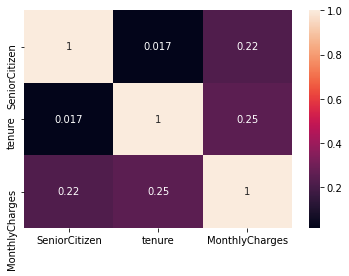

In [7]:
sb.heatmap(df.corr(), annot=True) 

## Convert the values of categorial columns to numeric columns

Updated heatmap with categorical data

<AxesSubplot:>

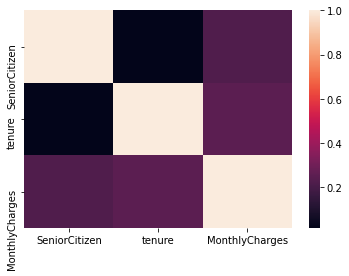

In [9]:
sb.heatmap(df.corr()) 

# Analysis of Data

## Monthly expenses of customers

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

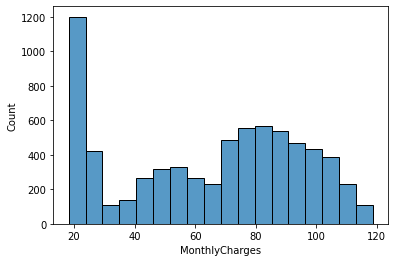

In [10]:
sb.histplot(df['MonthlyCharges']) 

## Internet service used by customers

D:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='InternetService', ylabel='count'>

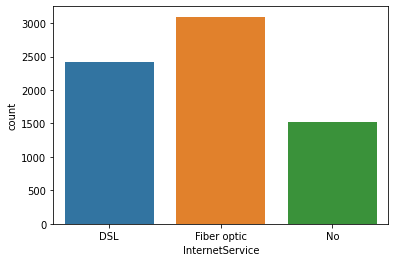

In [11]:
sb.countplot(df['InternetService']) 

<AxesSubplot:xlabel='InternetService', ylabel='count'>

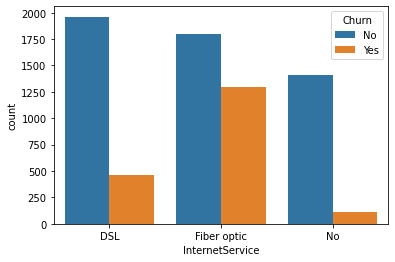

In [12]:
sb.countplot(data=df, x = 'InternetService', hue='Churn') 

Here we can see that customers who use fiber optic service are more likely to stay in the company

----

<AxesSubplot:xlabel='gender', ylabel='count'>

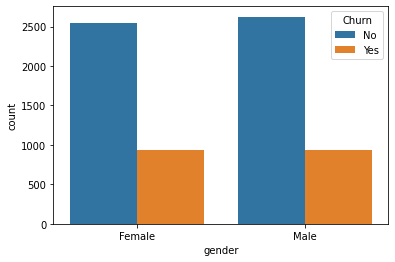

In [13]:
sb.countplot(data=df, x='gender', hue='Churn') 

So the ratio of churn is gender independent

## Service Contracts used by customers

<AxesSubplot:xlabel='Contract', ylabel='count'>

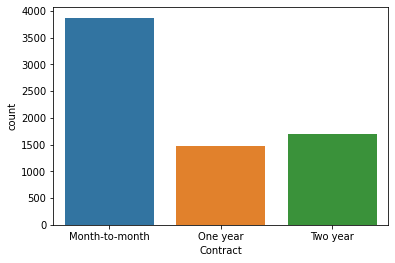

In [14]:
sb.countplot(x = 'Contract', data=df) 

# PreProcessing 

In [15]:
# TODO: Preprocess the data 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

In [16]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [17]:
for col in df.columns:
    if df[col].dtype == np.number:
        continue

    df[col] = LabelEncoder().fit_transform(df[col])


C:\Users\admin\AppData\Local\Temp/ipykernel_9104/684853344.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[col].dtype == np.number:


In [18]:
df.dtypes

customerID            int32
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [19]:
df.drop(['customerID'], axis=1, inplace=True)

x = df.drop(['Churn'], axis=1) 
y = df['Churn']


# Building the Model

In [20]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from xgboost import XGBClassifier

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2) 

## 1. Logistic Regression

In [22]:
lr_model = LogisticRegression()

lr_model.fit(xtrain, ytrain) 

D:\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 2. Random Forest Classifier

In [23]:
rfc_model = RandomForestClassifier()

rfc_model.fit(xtrain, ytrain) 

RandomForestClassifier()

## 3. K Neighbours Classifier

In [24]:
knc_model = KNeighborsClassifier() 

knc_model.fit(xtrain, ytrain) 

KNeighborsClassifier()

## 4. XGBoost

In [25]:
xg = XGBClassifier(n_estimators=1000, learning_rate=0.1, use_label_encoder=False)

xg.fit(xtrain, ytrain, early_stopping_rounds=5,eval_set=[(xtest, ytest)], verbose=False) 

[17:01:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

# Metrics

In [26]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, confusion_matrix


In [27]:
lr_pred = lr_model.predict(xtest) 
rfc_pred = rfc_model.predict(xtest)
knc_pred = knc_model.predict(xtest)
xgpreds = xg.predict(xtest)


## Classification Report

In [28]:
print("Logistic Regression\n", classification_report(ytest, lr_pred))

Logistic Regression
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1059
           1       0.59      0.53      0.56       350

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.79      0.79      1409



In [29]:
print("Random Forest\n", classification_report(ytest, rfc_pred)) 

Random Forest
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1059
           1       0.61      0.48      0.53       350

    accuracy                           0.79      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [30]:
print("K Neighbours\n", classification_report(ytest, knc_pred)) 

K Neighbours
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      1059
           1       0.50      0.38      0.43       350

    accuracy                           0.75      1409
   macro avg       0.65      0.63      0.64      1409
weighted avg       0.73      0.75      0.74      1409



In [31]:
print("XGBoost\n", classification_report(ytest, xgpreds)) 

XGBoost
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1059
           1       0.61      0.48      0.54       350

    accuracy                           0.80      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.80      0.79      1409



## Accuracy

In [32]:
print(f"Logistic Regression Model: {accuracy_score(ytest, lr_pred)}")
print(f"Random Forest Classifier Model: {accuracy_score(ytest, rfc_pred)}")
print(f"K Neighbours Classifier Model: {accuracy_score(ytest, knc_pred)}") 
print(f"XGBoost Model: {accuracy_score(ytest, xgpreds)}") 

Logistic Regression Model: 0.7906316536550745
Random Forest Classifier Model: 0.7927608232789212
K Neighbours Classifier Model: 0.7508871540099361
XGBoost Model: 0.7963094393186657


Logistic Regression wins!